**Efectos de Ventaneo en el Módulo de la Transformada de Fourier**

Caso 1: Ventana Rectangular (truncamiento de datos)

Considere la siguiente señal con tres componentes sinusoidales:
x(t) = A1 sin 2π f1t + A2 sin 2π f2t + A3 sin 2π f3t



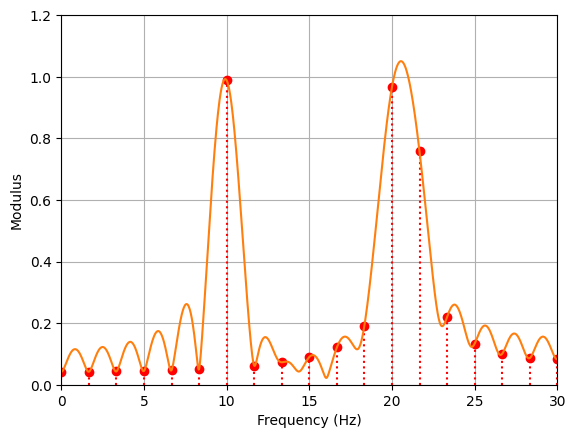

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
f1 = 10
f2 = 20
f3 = 21
fs = 60
T = 0.6  # window length  (try different values: 0.6, 0.8, 1.0, 1.5, 2, 2.5, 3, 4)

# Time vector
t = np.arange(0, T, 1/fs)

# Signal definition
x = 2*np.sin(2*np.pi*f1*t) + 2*np.sin(2*np.pi*f2*t) + 2*np.sin(2*np.pi*f3*t)

# FFT of the signal
N = len(x)
X = np.fft.fft(x)
f = fs * np.arange(0, N) / N

# Zero-padding and FFT
Xz = np.fft.fft(np.concatenate([x, np.zeros(2000-N)]))
Nz = len(Xz)
fz = fs * np.arange(0, Nz) / Nz

# Plotting the results
plt.figure(1)
plt.stem(f[0:N//2+1], np.abs(X[0:N//2+1])/fs/T, 'r:', basefmt=" ")
plt.axis([0, 30, 0, 1.2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Modulus')
plt.plot(fz[0:Nz//2+1], np.abs(Xz[0:Nz//2+1])/fs/T)
plt.grid(True)
plt.show()


Comentarios:

La ventana rectangular es simplemente la señal truncada (es decir, desde 0 hasta T segundos).
Note que en el código se hace un relleno con ceros. Esto es, agregar 'ceros' al final de la secuencia temporal para mejorar la apariencia en el dominio de la frecuencia, ya que se reduce el espaciamiento entre frecuencias. En otras palabras, el relleno con ceros en el dominio del tiempo resulta en una interpolación en el dominio de la frecuencia. A veces, este procedimiento se denomina ‘interpolación espectral’. Como resultado, la apariencia en el dominio de la frecuencia (DFT) se asemeja al espectro verdadero (integral de Fourier), por lo que es útil para fines de demostración. Sin embargo, no aumenta la resolución 'real', es decir, no mejora la capacidad de distinguir las frecuencias cercanas. Cabe destacar que la resolubilidad real en el dominio de la frecuencia depende de la longitud de los datos
𝑇
 y del tipo de ventana.
Dado que el relleno con ceros puede dar una impresión incorrecta de los resultados, no se utiliza en esta materia, excepto para algunos fines de demostración y propósitos especiales.



Caso 2: Ventana de Hanning

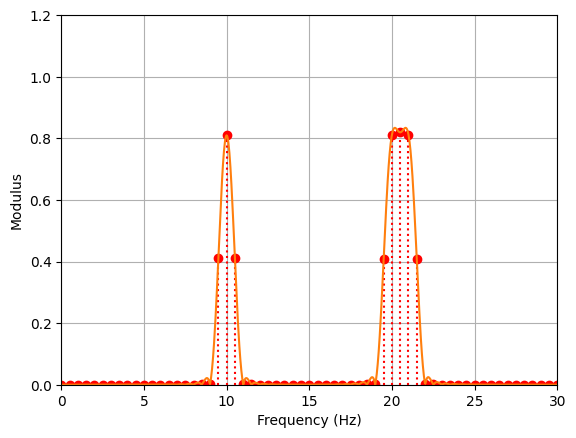

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
f1 = 10
f2 = 20
f3 = 21
fs = 60
T = 2  # window length, try different values: 0.6, 0.8, 1.0, 1.5, 2, 2.5, 3, 4

# Time vector
t = np.arange(0, T, 1/fs)

# Signal definition
x = 2 * np.sin(2 * np.pi * f1 * t) + 2 * np.sin(2 * np.pi * f2 * t) + 2 * np.sin(2 * np.pi * f3 * t)

# Applying Hanning window
N = len(x)
whan = np.hanning(N)
x = x * whan

# FFT of the signal
X = np.fft.fft(x)
f = fs * np.arange(0, N) / N

# Zero-padding and FFT
Xz = np.fft.fft(np.concatenate([x, np.zeros(2000-N)]))
Nz = len(Xz)
fz = fs * np.arange(0, Nz) / Nz

# Plotting the results
plt.figure(1)
plt.stem(f[0:N//2+1], np.sqrt(8/3) * np.abs(X[0:N//2+1])/fs/T, 'r:', basefmt=" ")
plt.axis([0, 30, 0, 1.2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Modulus')
plt.plot(fz[0:Nz//2+1], np.sqrt(8/3) * np.abs(Xz[0:Nz//2+1])/fs/T)
plt.grid(True)
plt.show()


**Comentarios:**

La componente de 10 Hz se incluye como referencia, es decir, con el propósito de comparación con los otros dos picos.
La línea sólida (DFT con relleno de ceros) es principalmente para fines de demostración, y la línea discontinua con círculos es la DFT real de la señal ventaneada. A partir de los resultados de la DFT (sin relleno de ceros), se muestra que las dos componentes sinusoidales (20 Hz y 21 Hz) se separan después de
𝑇
=
2
en el caso de una ventana rectangular. Por otro lado, no son completamente separables hasta
𝑇
=
4
si se utiliza la ventana de Hanning. Esto se debe a su lóbulo principal más ancho. Sin embargo, notamos que la disperasión de energía se reduce considerablemente con la ventana de Hanning.
En el caso de la ventana de Hanning, las magnitudes de los picos están subestimadas incluso si se utiliza el factor de escala. (Note que el lóbulo principal contiene más líneas de frecuencia que en la ventana rectangular).
Sin embargo, en el caso de la ventana rectangular, los picos se estiman correctamente cuando la longitud de los datos corresponde a períodos exactos de la señal, es decir, cuando
𝑇
=
1, 2, 3 y 4.
Note que las frecuencias de los picos están ubicadas con precisión en este caso (ver el componente de 21 Hz). Compare esto con los otros casos (*T* no entero).



**Efecto del Ventaneo en la resolución en amplitud:**

Considere el caso de dos señales sinusoidales con una diferencia muy significativa en la amplitud *A*1>>*A*2. Para este ejemplo en particular, *A*1 = 1 y *A*2 = 0,001. Otros parámetros utilizados son f1 = 9 Hz, f2 = 14 Hz, ventana de observación T = 15,6 s, frecuencia de muestreo fs = 50 muestras/s.

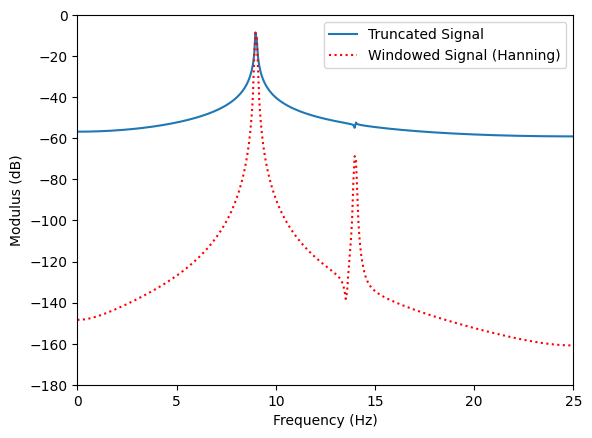

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
f1 = 9
f2 = 14
fs = 50
T = 15.6  # to see some windowing effect

# Time vector
t = np.arange(0, T, 1/fs)

# Signal definition
x = 1 * np.sin(2 * np.pi * f1 * t) + 0.001 * np.sin(2 * np.pi * f2 * t)

# Applying Hanning window
N = len(x)
whan = np.hanning(N)
xh = x * whan

# FFT of the signals
X = np.fft.fft(x)
Xh = np.fft.fft(xh)
f = fs * np.arange(0, N) / N

# Plotting the results
plt.figure(1)
plt.plot(f[:N//2+1], 20 * np.log10(np.abs(X[:N//2+1]) / fs / T), label='Truncated Signal')
plt.plot(f[:N//2+1], 20 * np.log10(np.sqrt(8/3) * np.abs(Xh[:N//2+1]) / fs / T), 'r:', label='Windowed Signal (Hanning)')
plt.axis([0, 25, -180, 0])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Modulus (dB)')
plt.legend()
plt.show()
